In [2]:
import warnings
from matplotlib import pyplot
warnings.filterwarnings("ignore")
from summer.utils import ref_times_to_dti
from autumn.core.project import get_project
from autumn.core.project import Project, ParameterSet, load_timeseries, build_rel_path, use_tuned_proposal_sds, get_all_available_scenario_paths
from autumn.core.utils.display import pretty_print
import json
import pandas as pd
from autumn.settings import  BASE_PATH, PROJECTS_PATH
from pathlib import PurePath
#from addict import Dict
#import sys
from autumn.projects.tuberculosis.kiribati.project import ANALYSIS

In [3]:
pyplot.style.use("ggplot")

In [4]:
project = get_project("tuberculosis","kiribati")

In [5]:
base_params = project.param_set.baseline
sc_models = project.param_set.scenarios

In [6]:
model_0 = project.run_baseline_model(base_params)

In [7]:
base_outdf = model_0.get_derived_outputs_df()

In [8]:
sc_models = project.run_scenario_models(model_0, project.param_set.scenarios)
scenario_dfs = [m.get_derived_outputs_df() for m in sc_models]

In [10]:
# start_times = [
#     sc_params.to_dict()["time"]["start"] for sc_params in sc_params_dict
# ]
# sc_models = project.run_scenario_models(base_model, sc_params_dict, start_times=start_times)
# scenario_dfs = [m.get_derived_outputs_df() for m in sc_models]
# base_stime = base_params['time']['start']

In [9]:
outputs_to_plot = ["population_size", "notifications", "incidence", "cumulative_diseased"]
# plot_end_time = base_params['time']['end']

In [10]:
ts_path = PurePath(BASE_PATH, "autumn", "projects", "tuberculosis", "kiribati", "timeseries.json")
def load_ts(path):
    with open(path, "r") as f:
        data = json.load(f)
    return data
ts_set = load_ts(ts_path)

In [11]:
out =  [name for name in outputs_to_plot if(len(ts_set[name]['times']))]
for outname in out:
            valname = str(outname)
            if out.index(outname) == 0:
                basedf = pd.DataFrame({'Years':ts_set[outname]['times'], valname:ts_set[outname]['values']})
            else:
                basedf = basedf.merge(pd.DataFrame({'Years':ts_set[outname]['times'], valname:ts_set[outname]['values']}), how = 'outer', on="Years")     
basedf.index = basedf['Years']

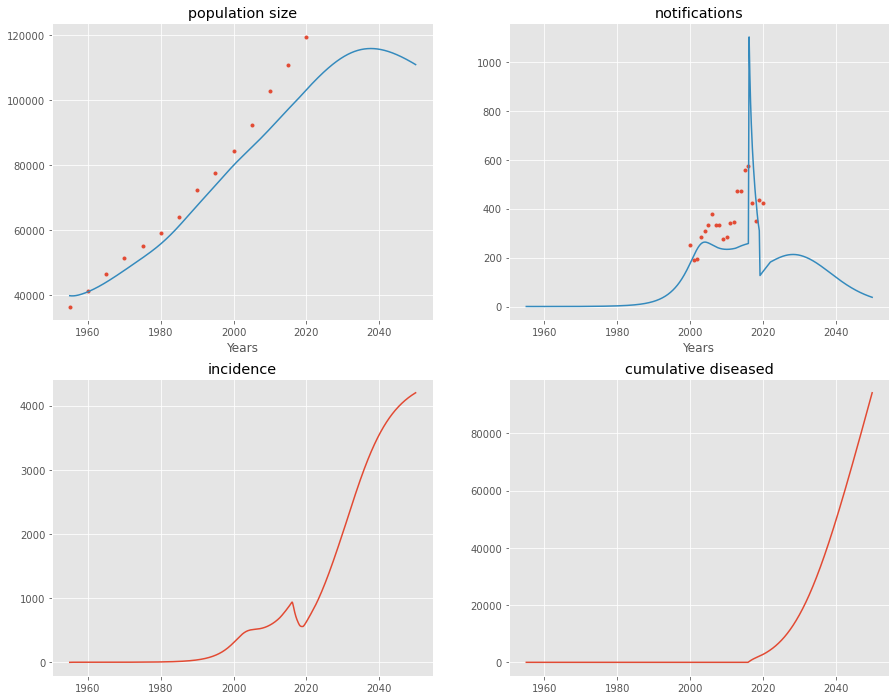

In [12]:
fig = pyplot.figure(figsize=(15, 12))
for i_out, output in enumerate(outputs_to_plot):
    axis = fig.add_subplot(2, 2, i_out + 1)
    if output in out:
        basedf[output].plot(style='.')
    base_outdf[output].plot(label="baseline")
    axis.set_title(output.replace("_", " "))

In [16]:
base_params['age_breakpoints']

[0, 5, 15, 35, 50]

In [19]:
from autumn.core.inputs.social_mixing.queries import get_prem_mixing_matrices

In [23]:
age_mixing_matrices = get_prem_mixing_matrices('FJI', [0,5,15,35,50], None)

In [24]:
age_mixing_matrices

{'all_locations': array([[ 2.55884222,  2.33360126,  3.88045098,  2.02828451,  1.08258701],
        [ 0.9485467 , 13.61399905,  3.33919734,  2.64303828,  0.81721011],
        [ 0.69506068,  2.49642169, 11.51236022,  3.05620109,  1.19456921],
        [ 0.57619807,  2.18943391,  4.33692325,  3.86024735,  1.24332513],
        [ 0.4019074 ,  1.13249585,  2.16677858,  1.56225504,  1.16848891]]),
 'home': array([[0.45423987, 1.11747913, 1.71320081, 0.83092696, 0.35084388],
        [0.36867053, 1.54992339, 1.15175811, 1.12231515, 0.27268324],
        [0.4506673 , 0.71557557, 1.45510365, 0.5341654 , 0.37757115],
        [0.39438566, 1.42172406, 1.04280107, 0.68467665, 0.23743117],
        [0.33871881, 0.75320054, 1.01431609, 0.5536283 , 0.51409058]]),
 'other_locations': array([[1.78271564, 1.1650013 , 2.09178642, 1.13667087, 0.71278058],
        [0.55260543, 5.52384986, 1.82687285, 1.2172526 , 0.47661913],
        [0.23664504, 1.01805121, 6.03157733, 1.20083137, 0.42333027],
        [0.149321